## METHODS COMPARISON USING CIFAR100 WITH 100 CLASSES

#### ENCODED DATA

On this file, the logistic regression proccess is done in order to compare it with the results of the Structure Predictions package. \
We find out that there are some considerable differences. 

For this exercice we use the CIFAR100 dataset provided by Keras. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes. 

In [2]:
import arff
import numpy as np
import os
from os.path import join
from scipy import sparse
from stpredictions.models.DIOKR.utils import project_root

# bibtex
# files (sparse): Train and test sets along with their union and the XML header [bibtex.rar]
# source: I. Katakis, G. Tsoumakas, I. Vlahavas, "Multilabel Text Classification for Automated Tag Suggestion",
# Proceedings of the ECML/PKDD 2008 Discovery Challenge, Antwerp, Belgium, 2008.


# split dataset using
#
# dir_path = os.path.dirname(os.path.realpath(__file__))


# @profile

def load_bibtex():
    """
    Load the bibtex dataset for IOKR.
    __author__ = "Michael Gygli, ETH Zurich"
    from https://github.com/gyglim/dvn/blob/master/mlc_datasets/__init__.py

    Parameters
    ----------
    dir_path : string - containing location of bibtex.arff


    Returns
    -------
    X : np.array
        Explanatory variables - N * 1836 array variables in one vector - e.g. 'dependent', 'always'

    Y : np.array
        Target variables - N * 159 array variables in one vector - e.g. 'TAG_system', 'TAG_social_nets'

    X_txt : list
            Explanatory variables - N * 1836 list variables in one vector - e.g. 'dependent', 'always'

    Y_txt : list
            Target variables - N * 159 list variables in one vector - e.g. 'TAG_system', 'TAG_social_nets'

    """

    #this_dir, this_filename = os.path.split(__file__)
    #DATA_PATH = os.path.join(this_dir, "bibtex", "bibtex.arff")

    feature_idx = 1836

    dataset = arff.load(open("bibtex.arff"))
    data = np.array(dataset['data'], np.int64)

    X = data[:, 0:feature_idx]
    Y = data[:, feature_idx:]

    return X, Y

In [3]:
X, Y= load_bibtex()

In [4]:
X.shape

(7395, 1836)

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

import time


2022-09-06 10:50:49.290634: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-06 10:50:50.306979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 10:50:50.307010: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
import pandas as pd

data = pd.read_csv (r'encoded_data.csv')
print (data)


                                                       X  \
0      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
1      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
2      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
3      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
4      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
...                                                  ...   
59995  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
59996  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
59997  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
59998  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   
59999  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...   

                                         Y  
0              b'cG9wcHlfc18wMDAxMjgucG5n'  
1              b'cG9wcHlfc18wMDE3ODEucG5n'  
2              b'cG9wcHlfc18wMDE0NzIucG5n'  
3              b'cG9wcHlfc18wMDE5NjAucG5n'  
4              b'cG9wcHlfc18wMDE3MTcucG5n'  
...      

In [7]:
#data.columns = data.iloc[0] 

In [8]:
X_data = pd.DataFrame(data, columns= ["X"])
print (X_data)

                                                       X
0      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
1      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
2      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
3      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
4      b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
...                                                  ...
59995  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
59996  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
59997  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
59998  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...
59999  b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2j...

[60000 rows x 1 columns]


In [9]:
Y_data = pd.DataFrame(data, columns= ["Y"])
print (Y_data)

                                         Y
0              b'cG9wcHlfc18wMDAxMjgucG5n'
1              b'cG9wcHlfc18wMDE3ODEucG5n'
2              b'cG9wcHlfc18wMDE0NzIucG5n'
3              b'cG9wcHlfc18wMDE5NjAucG5n'
4              b'cG9wcHlfc18wMDE3MTcucG5n'
...                                    ...
59995          b'd3RjX3NfMDAxNjEzLnBuZw=='
59996  b'c2t5c2NyYXBlcl9zXzAwMTQ5NC5wbmc='
59997  b'c2t5c2NyYXBlcl9zXzAwMTY3NS5wbmc='
59998  b'c2t5c2NyYXBlcl9zXzAwMDYwMi5wbmc='
59999  b'dHdpbl90b3dlcnNfc18wMDIwMTAucG5n'

[60000 rows x 1 columns]


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data.values, Y_data.values, test_size=0.166666666, random_state=0)

In [11]:
print(type(X_train))

<class 'numpy.ndarray'>


In [12]:
# Check the shape of the array
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)
 
# Number of data set samples 
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# Data format confirmation
#print(type(X_test))
#print(type(Y_test[0]))

x_train shape: (50000, 1)
x_test shape: (10000, 1)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train samples
10000 test samples


### Organizing data

We just want the first 10 categories of the dataset, so that's why we create a new train dataset and test dataset with those labels as below

In [13]:
print('Number of records for 100 classes X train',X_train.shape)
print('Number of records for 100 classes X test',X_test.shape)
print('Number of records for 100 classes Y train',Y_train.shape)
print('Number of records for 100 classes Y test',Y_test.shape)

Number of records for 100 classes X train (50000, 1)
Number of records for 100 classes X test (10000, 1)
Number of records for 100 classes Y train (50000, 1)
Number of records for 100 classes Y test (10000, 1)


In [14]:
print("First 5 entries of X_train",X_train[0:5])
print("First 5 entries of X_test",X_test[0:5])
print("First 5 entries of Y_train",Y_train[0:5])
print("First 5 entries of Y_test",Y_test[0:5])

First 5 entries of X_train [["b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2jAAAAB3RJTUUH4wkTDh0BkU0oDAAACJlJREFUSIk1zkmTXNdxBeDMvPdN9aqqu6onNAACICgwNFikaNkSvbA3XjgcWmipX6iNI/wH7JV3XtEyKYLREJpkA40eUN01vPFOmekF5IgTcXbfOfi7P35LuTV5ZibGZgYBkNAQagRgFO+xD9HHgiC5EDWVk3x+uCCLMcYgfhj9dDatZuXffrT88iA/MDpDyJEVcoe4UbVMYDJrqsIWpKCibA0BkSZRSTnxYmGPl3t1kYXgmqZxHQzdpvchhgCFNTYXz1JqTnhoaR9ZhBnUomaCU0QLmVGDCSEzRoURCRCBUAmNoZP9+XFtCwt1YQxWT49muWbbrtvumndXV9frjs0kiZFJmUCsqhB2BiswiAoshtWaojRVjtYwirUkikqUABQgRzUgTdtlkHmbGYyl4aqImNGT06OfnB78cHn/p9dXu80OLO76RbMEQN6wetDMsAHDgJaqAgpShAgJEUVIWSnLLIENzu1il8aCTDLTvu9Y/P68znMEwAf7sxdPlkcH5auL9k3Tvl21/7Owz0vwYu+YjTWZQWa0mjOTEJEqOZ+UxVhrSYwPqR170RjGQKbjMTn39Nn+rx4vq4n587ubb84u1ofLJ4+mP//0aG9TXTr/ctW1y3lGIixFQgQREYsIwKgCwCBeNXGSSMbj0PvVmtEYgt0wkoVPPz198nwhpV27/uF8v6Pxf7958347++LnTx8ezmpHr69W5z1mNSJAmedEqCyWR5TEyqoxEQuJ+GGs9yZxt3PrdTI4nZRu13z2219OF/urTbpNDWia5faTFwdvzl76m8N39f6zF0c2jROQ78/Py73aWGtyU5WVJLTD+3sKkGJETSgiQ7AGq7psdgOPY0D1ykcfHZuqvLlcA4pFcL47PN5PYL74u08uX91e

In [15]:
from sklearn.linear_model import LogisticRegression


For the Logistic Regression implementation, it's needed an X array with dimension <= 2. In this case, we have a dimension of 4, that's why we have to do a reshape as below

The same process has to be done for the other methods 

In [19]:
X_train.shape

(50000, 1)

In [32]:
print(X_train_rshp[0])

["b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2jAAAAB3RJTUUH4wkTDh0BkU0oDAAACJlJREFUSIk1zkmTXNdxBeDMvPdN9aqqu6onNAACICgwNFikaNkSvbA3XjgcWmipX6iNI/wH7JV3XtEyKYLREJpkA40eUN01vPFOmekF5IgTcXbfOfi7P35LuTV5ZibGZgYBkNAQagRgFO+xD9HHgiC5EDWVk3x+uCCLMcYgfhj9dDatZuXffrT88iA/MDpDyJEVcoe4UbVMYDJrqsIWpKCibA0BkSZRSTnxYmGPl3t1kYXgmqZxHQzdpvchhgCFNTYXz1JqTnhoaR9ZhBnUomaCU0QLmVGDCSEzRoURCRCBUAmNoZP9+XFtCwt1YQxWT49muWbbrtvumndXV9frjs0kiZFJmUCsqhB2BiswiAoshtWaojRVjtYwirUkikqUABQgRzUgTdtlkHmbGYyl4aqImNGT06OfnB78cHn/p9dXu80OLO76RbMEQN6wetDMsAHDgJaqAgpShAgJEUVIWSnLLIENzu1il8aCTDLTvu9Y/P68znMEwAf7sxdPlkcH5auL9k3Tvl21/7Owz0vwYu+YjTWZQWa0mjOTEJEqOZ+UxVhrSYwPqR170RjGQKbjMTn39Nn+rx4vq4n587ubb84u1ofLJ4+mP//0aG9TXTr/ctW1y3lGIixFQgQREYsIwKgCwCBeNXGSSMbj0PvVmtEYgt0wkoVPPz198nwhpV27/uF8v6Pxf7958347++LnTx8ezmpHr69W5z1mNSJAmedEqCyWR5TEyqoxEQuJ+GGs9yZxt3PrdTI4nZRu13z2219OF/urTbpNDWia5faTFwdvzl76m8N39f6zF0c2jROQ78/Py73aWGtyU5WVJLTD+3sKkGJETSgiQ7AGq7psdgOPY0D1ykcfHZuqvLlcA4pFcL47PN5PYL74u08uX91e/vBmeTJPIHuziTv7oVvtyllJVdEV

There's a problem with the prediction Methods. Mainly in the fact that the Base64 format is from a different type, and it's not possible to convert it to string. For these reasons, it was decided to continue working in a different way to get the predictions from an encoded format. In other files, we'll be working with a binary format conversion.

### Logistic Regression method

In [33]:
lr_start_time=time.time()

In [20]:
logreg =  LogisticRegression()
logreg.fit(X_train,Y_train) ## fitting the logistic regression model

ValueError: could not convert string to float: "b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2jAAAAB3RJTUUH4wkTDh0BkU0oDAAACJlJREFUSIk1zkmTXNdxBeDMvPdN9aqqu6onNAACICgwNFikaNkSvbA3XjgcWmipX6iNI/wH7JV3XtEyKYLREJpkA40eUN01vPFOmekF5IgTcXbfOfi7P35LuTV5ZibGZgYBkNAQagRgFO+xD9HHgiC5EDWVk3x+uCCLMcYgfhj9dDatZuXffrT88iA/MDpDyJEVcoe4UbVMYDJrqsIWpKCibA0BkSZRSTnxYmGPl3t1kYXgmqZxHQzdpvchhgCFNTYXz1JqTnhoaR9ZhBnUomaCU0QLmVGDCSEzRoURCRCBUAmNoZP9+XFtCwt1YQxWT49muWbbrtvumndXV9frjs0kiZFJmUCsqhB2BiswiAoshtWaojRVjtYwirUkikqUABQgRzUgTdtlkHmbGYyl4aqImNGT06OfnB78cHn/p9dXu80OLO76RbMEQN6wetDMsAHDgJaqAgpShAgJEUVIWSnLLIENzu1il8aCTDLTvu9Y/P68znMEwAf7sxdPlkcH5auL9k3Tvl21/7Owz0vwYu+YjTWZQWa0mjOTEJEqOZ+UxVhrSYwPqR170RjGQKbjMTn39Nn+rx4vq4n587ubb84u1ofLJ4+mP//0aG9TXTr/ctW1y3lGIixFQgQREYsIwKgCwCBeNXGSSMbj0PvVmtEYgt0wkoVPPz198nwhpV27/uF8v6Pxf7958347++LnTx8ezmpHr69W5z1mNSJAmedEqCyWR5TEyqoxEQuJ+GGs9yZxt3PrdTI4nZRu13z2219OF/urTbpNDWia5faTFwdvzl76m8N39f6zF0c2jROQ78/Py73aWGtyU5WVJLTD+3sKkGJETSgiQ7AGq7psdgOPY0D1ykcfHZuqvLlcA4pFcL47PN5PYL74u08uX91e/vBmeTJPIHuziTv7oVvtyllJVdEVOYGx8cd3rBJjBARiJaLFoxP1Lg0+DKNA3DtazI+Pr6/vKUQyak02jEO3ywnq4+WxrTfXF2/r88XywWFRFccHi9dnP7L3WGaaGUNoebeNySVOQEWOdvbwxJbZZn3nxl6VMYPF49O2i24zlhMDKXHCPKvu7xtRrcrl889efP/28uL8Ip8dsNXD04OX33wXnMMcTZGLijn4zb9aFqtKilhkp88eu74d7tax7xD14ccfY5b7MUwm1Xx/WtUloeY5IkJdl3uL2Wxif/bo8Oy78wR5NqlUaXV13axu2DsOIXpvuWmlKA0ZY3DvyQM2yv3AwwAqi9MHaqvQx3palbO6Kou8IKwzosSprusCib2X3/7s2fZu+1/fXuZ1haaYT+dXw5+rfNYPPWbWBhfIEEBWnx5PphW7UdwIyVez+fzho+BjUWVmkgEEoBzR2Dyb1XlV1sPQbnfbbFrlmf3dP/zy1bu7IfYUxrrc05gS9KLkhw2xRBD1GdX7c4gc+iF6j2V29PFHOCkOH5/Uy3k5KVWSzWRwW8UUg67vt96H+bQax/7ibj0v8Q//9DnfXXFIBLqYz7b3K9fvXLMliU5SrI+XhJqGIfSDxJTNJuXBXjGvsSCwUFb53v7UWBH102l5c/P+7dur25vV2LW7XfNm5xzS588Of/3Rsl1dd+328emRpOC2d7FvSJIX5umkjsOQghPnU4jzxX41m+aZFY5FbgEkppBYU9LgRTUZou22uXpz3ezC+86eNzwg/vOXv8jdnR/648XcgohrxQ2kksgYZNGQQt9LCoS6f3ScIve7Ng4Dp2gtuW64eXM5ncy6btzc35LJlgfHk2J6f9uenf341euL6xAfHS9/9fR4t12XGcTgkRMEZ1VQgZwPxC66HqLPi8LM90QVE3NyWth245rVJnbNpqiyDLbXK8K9jz95lhof/Xjz3Vf+Npva38w/+5vf/8s/fn31b6QKrKAGGMzei7/PqmleTySMYeg1pfLwsNxf+O0u9t2w2fAQN6v3SOSGMSlBiH7Xd9sVxt6Pm+XB3nS/fPnV199+fXHV9rOT2Zef//S///T27OVLiT7FYObPf51NpkVVgneub4Bl/vhpGAO37bBdDZv7fvU+9rvohszY5OPm9tow3F+fb99f9V1zcDR/9pOT6MeLs7+8Pr9++apbHB/9+3/853C74uATRzN7/gUUVZ4XPPTJjSwyP3mijVM/Ds19aO+GzUVotu5uxSDjrlm/vySl5Hd921pb3t5d+qiT/QdDO7TrXde6b179ZfX9uYxBomdJFkQlxnEcTRyAErOJ48jNNrl27LeUxtj10cXCZM3QowJobGMcdnddu222G8qp24otZ6pZfbJcX75Z34wweNUkoKpiRRQ4RT+y2wnHLN8LrvPDetyuSbkk9B3H6KDQsbkPwRvkNO3ExX632TX3VTV3HedFmQgCc9x2MIysAiAKCqCWU2DXW2ti3/lhmCwz12xC34NKGPsY3NhuELgdmhgHliQS+6bJTRVCUIIutXkQoFZFvHMG0CiqiiiriipYiS52QiIAEUCINDQbP7QgKfnBb+/BjyEMnJJoFFUFBRFGNRZQRIWTOgAAFgNKxgKAiLAwAIiylZRIwbcN1VBOS4Y47rbMPkUvrg9DD65nCSIKSoSkSIAWQYUjIBCCpgigKiqgDFplVUpRRQBRmK0kRUOmLmLyzAEDhjSghMghjh0PLUoEFRFRAWsysEYkKSgoIJKgAKGAIgACAIsYERFUFUnAyapyStFAmRnbb9dZnosyRAecNEWQJBxVgYiQUEGYkyogIgAAqKoCogAgACmASkoJVEFVRVTEKscEYpwxhiTFEEeBhNEbERVVTsAsgIgIhkQ+HEdV/cADAAIiIACIKgCwBAVRFVVVVQvMYAmFR9dr8iaxYFJOwCAqKhGVRUnhry59wP7/PwBAUkIERAEFAOYIqiogoiJqQRMnlUgoIiykAAIqmERUBUU+cMICyAAIkIhI/zrwoUDhQ5QQVEQVUAFUAOT/AALkitgydftzAAAAAElFTkSuQmCC'"

In [12]:
y_pred=logreg.predict(X_test_rshp)
y_pred

array([49, 27, 15, ..., 18, 20, 92])

In [13]:
len(y_pred)

10000

In [14]:
len(X_test)

10000

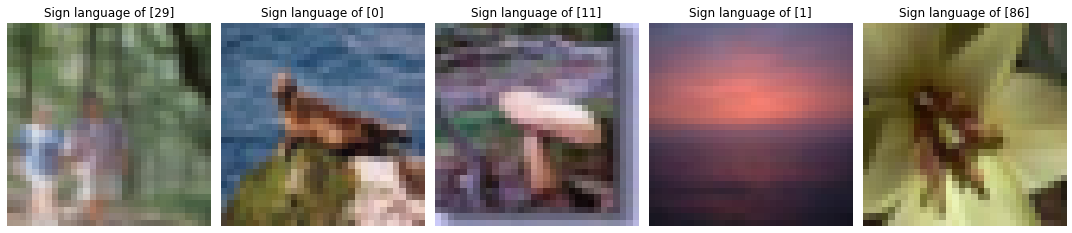

In [15]:
plt.figure(figsize=(15,5))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(X_test[i,:,:],cmap='gray')
  plt.title('Sign language of {}'.format(Y_train[i]))
  plt.axis('off')
  plt.tight_layout()
plt.show()

#### Table for classification report and confusion

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score

In [17]:
logreg.score(X_test_rshp[0:100],Y_test) ## Overall accuracy score of the logistic regression model

0.1733

In [18]:
lr_cm=confusion_matrix(y_pred,Y_test) ## To obtain the confusion matrix
print(classification_report(y_pred,Y_test))

print()
print("Execution Time %s seconds: " % (time.time() - lr_start_time))

              precision    recall  f1-score   support

           0       0.32      0.31      0.32       103
           1       0.20      0.14      0.17       142
           2       0.08      0.10      0.09        82
           3       0.06      0.11      0.08        54
           4       0.03      0.06      0.04        53
           5       0.11      0.07      0.09       150
           6       0.16      0.13      0.14       123
           7       0.27      0.21      0.24       126
           8       0.15      0.16      0.15        95
           9       0.27      0.23      0.25       119
          10       0.08      0.09      0.08        90
          11       0.11      0.12      0.12        89
          12       0.17      0.17      0.17        99
          13       0.12      0.11      0.12       106
          14       0.11      0.10      0.11       107
          15       0.12      0.18      0.14        68
          16       0.18      0.17      0.18       105
          17       0.34    

In [19]:
lr_cm

array([[32,  1,  1, ...,  0,  1,  0],
       [ 2, 20,  2, ...,  2,  1,  0],
       [ 0,  1,  8, ...,  2,  3,  1],
       ...,
       [ 0,  1,  3, ..., 10,  1,  1],
       [ 0,  1,  4, ...,  0,  8,  0],
       [ 0,  0,  1, ...,  1,  0,  6]])

In [20]:
f1_test = f1_score(y_pred, Y_test, average='weighted')
print( "Test f1 score:", f1_test)

Test f1 score: 0.18212089754251432


In [21]:
y_pred

array([49, 27, 15, ..., 18, 20, 92])

In [22]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

### Structure Predictions method

We procceed to create execute the Structure predictions method in order to identify differences and get some conclusions.

In [11]:
from stpredictions.models.IOKR.model import IOKR


Here we implement the class IOKR2 due to some issues:

In [36]:
# Implementation
import time
# from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
# from sklearn.metrics import f1_score
import numpy as np
# import pandas as pd
# from stpredictions.datasets.load_data import load_bibtex
# from sklearn.model_selection import train_test_split
# import arff
from numpy.linalg import inv
# import os

# from line_profiler import LineProfiler

"""
Created on December 12, 2021
"""


class IOKR2:
    """
    Class used to apply Input and Output Kernel Regression
    """

    
    def __init__(self):
        """
        Initialization of the below parameters.
        Parameters
        ----------
        X_train :  sparse matrix - containing explanatory variables of the train set
        Y_train: sparse matrix - containing target variable of the train set
        Ky: output scalar kernel
        M: gram matrix on training set
        verbose: binary - display more parameters
        linear:
        """
        self.X_train = None
        self.Y_train = None
        self.Ky = None
        self.M = None
        self.verbose = 0
        self.input_kernel = None
        self.output_kernel = None

  
    def fit(self, X, Y, L, input_kernel='linear', input_kernel_param=None):
        """
        Model Fitting
        """

        # save input and output training data
        self.X_train, self.Y_train = X, Y

        # instantiate input kernel parameter when not given
        if input_kernel_param is None:
            if input_kernel == 'rbf':
                input_kernel_param = 1.
            elif input_kernel == 'polynomial':
                input_kernel_param = [3, None, 1]

        # define input kernel
        if input_kernel == 'linear':
            self.input_kernel = lambda A, B: linear_kernel(A, B)
        elif input_kernel == 'polynomial':
            self.input_kernel = lambda A, B: polynomial_kernel(A, B, degree=input_kernel_param[0],
                                                               gamma=input_kernel_param[1], coef0=input_kernel_param[2])
        elif input_kernel == 'rbf':
            self.input_kernel = lambda A, B: rbf_kernel(A, B, gamma=input_kernel_param)
        else:
            self.input_kernel = input_kernel

        # compute input gram matrix
        Kx = self.input_kernel(X, X)

        # kernel ridge regression training computation: n x n matrix inversion
        t0 = time.time()
        n = Kx.shape[0]
        self.M = np.linalg.inv(Kx + n * L * np.eye(n))
        if self.verbose > 0:
            print(f'Fitting time: {time.time() - t0} in s')

    def alpha(self, X_test):

        Kx = self.input_kernel(self.X_train, X_test)
        A = self.M.dot(Kx)

        return A


    def predict(self, X_test, Y_candidates, output_kernel='linear', output_kernel_param=None):

        """
        Model Prediction
        """

        # instantiate output kernel parameter when not given
        if output_kernel_param is None:
            if output_kernel == 'rbf':
                output_kernel_param = 1.
            elif output_kernel == 'polynomial':
                output_kernel_param = [3, None, 1]

        # define output kernel
        if output_kernel == 'linear':
            self.output_kernel = lambda A, B: linear_kernel(A, B)
        elif output_kernel == 'polynomial':
            self.output_kernel = lambda A, B: polynomial_kernel(A, B, degree=output_kernel_param[0],
                                                                gamma=output_kernel_param[1],
                                                                coef0=output_kernel_param[2])
        elif output_kernel == 'rbf':
            self.output_kernel = lambda A, B: rbf_kernel(A, B, gamma=output_kernel_param)
        else:
            self.output_kernel = output_kernel

        # compute output gram matrix
        Ky = self.output_kernel(self.Y_train, Y_candidates)

        # compute prediction
        t0 = time.time()
        Alpha = self.alpha(X_test)
        scores = Ky.transpose().dot(Alpha)
        idx_pred = np.argmax(scores, axis=0)
        Y_pred = Y_candidates[idx_pred]
        if self.verbose > 0:
            print(f'Decoding time: {time.time() - t0} in s')

        return Ky,Alpha,scores,idx_pred,Y_pred




In [39]:
nb_class=100

In [25]:
sp_start_time= time.time()

In [37]:
print(X_train_rshp.shape)
print(X_test_rshp.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 1)
(10000, 1)
(50000, 1)
(10000, 1)


In [40]:
Y_tra=np.zeros([len(Y_train),nb_class])
Y_tes=np.zeros([len(Y_test),nb_class])
for t in range(len(Y_train)):
  Y_tra[t][Y_train[t][0]]=1
for t in range(len(Y_test)):
  Y_tes[t][Y_test[t][0]]=1

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
clf = IOKR2()
clf.verbose = 1
L =1e-6
#Just using a quantity of 100 due to a shape problem 
clf.fit(X=X_train_rshp[0:100], Y=Y_tra[0:100], L=L, input_kernel='linear')
Ky,Alpha,scores,idx_pred,Y_pred_test = clf.predict(X_test=X_test_rshp, Y_candidates=np.eye(100))
#f1_test_st = f1_score(Y_pred_test, Y_test, average='weighted')
#print( "Test f1 score:", f1_test_st)
print(Y_pred_test[1])

ValueError: could not convert string to float: "b'iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAIAAAD8GO2jAAAAB3RJTUUH4wkTDh0BkU0oDAAACJlJREFUSIk1zkmTXNdxBeDMvPdN9aqqu6onNAACICgwNFikaNkSvbA3XjgcWmipX6iNI/wH7JV3XtEyKYLREJpkA40eUN01vPFOmekF5IgTcXbfOfi7P35LuTV5ZibGZgYBkNAQagRgFO+xD9HHgiC5EDWVk3x+uCCLMcYgfhj9dDatZuXffrT88iA/MDpDyJEVcoe4UbVMYDJrqsIWpKCibA0BkSZRSTnxYmGPl3t1kYXgmqZxHQzdpvchhgCFNTYXz1JqTnhoaR9ZhBnUomaCU0QLmVGDCSEzRoURCRCBUAmNoZP9+XFtCwt1YQxWT49muWbbrtvumndXV9frjs0kiZFJmUCsqhB2BiswiAoshtWaojRVjtYwirUkikqUABQgRzUgTdtlkHmbGYyl4aqImNGT06OfnB78cHn/p9dXu80OLO76RbMEQN6wetDMsAHDgJaqAgpShAgJEUVIWSnLLIENzu1il8aCTDLTvu9Y/P68znMEwAf7sxdPlkcH5auL9k3Tvl21/7Owz0vwYu+YjTWZQWa0mjOTEJEqOZ+UxVhrSYwPqR170RjGQKbjMTn39Nn+rx4vq4n587ubb84u1ofLJ4+mP//0aG9TXTr/ctW1y3lGIixFQgQREYsIwKgCwCBeNXGSSMbj0PvVmtEYgt0wkoVPPz198nwhpV27/uF8v6Pxf7958347++LnTx8ezmpHr69W5z1mNSJAmedEqCyWR5TEyqoxEQuJ+GGs9yZxt3PrdTI4nZRu13z2219OF/urTbpNDWia5faTFwdvzl76m8N39f6zF0c2jROQ78/Py73aWGtyU5WVJLTD+3sKkGJETSgiQ7AGq7psdgOPY0D1ykcfHZuqvLlcA4pFcL47PN5PYL74u08uX91e/vBmeTJPIHuziTv7oVvtyllJVdEVOYGx8cd3rBJjBARiJaLFoxP1Lg0+DKNA3DtazI+Pr6/vKUQyak02jEO3ywnq4+WxrTfXF2/r88XywWFRFccHi9dnP7L3WGaaGUNoebeNySVOQEWOdvbwxJbZZn3nxl6VMYPF49O2i24zlhMDKXHCPKvu7xtRrcrl889efP/28uL8Ip8dsNXD04OX33wXnMMcTZGLijn4zb9aFqtKilhkp88eu74d7tax7xD14ccfY5b7MUwm1Xx/WtUloeY5IkJdl3uL2Wxif/bo8Oy78wR5NqlUaXV13axu2DsOIXpvuWmlKA0ZY3DvyQM2yv3AwwAqi9MHaqvQx3palbO6Kou8IKwzosSprusCib2X3/7s2fZu+1/fXuZ1haaYT+dXw5+rfNYPPWbWBhfIEEBWnx5PphW7UdwIyVez+fzho+BjUWVmkgEEoBzR2Dyb1XlV1sPQbnfbbFrlmf3dP/zy1bu7IfYUxrrc05gS9KLkhw2xRBD1GdX7c4gc+iF6j2V29PFHOCkOH5/Uy3k5KVWSzWRwW8UUg67vt96H+bQax/7ibj0v8Q//9DnfXXFIBLqYz7b3K9fvXLMliU5SrI+XhJqGIfSDxJTNJuXBXjGvsSCwUFb53v7UWBH102l5c/P+7dur25vV2LW7XfNm5xzS588Of/3Rsl1dd+328emRpOC2d7FvSJIX5umkjsOQghPnU4jzxX41m+aZFY5FbgEkppBYU9LgRTUZou22uXpz3ezC+86eNzwg/vOXv8jdnR/648XcgohrxQ2kksgYZNGQQt9LCoS6f3ScIve7Ng4Dp2gtuW64eXM5ncy6btzc35LJlgfHk2J6f9uenf341euL6xAfHS9/9fR4t12XGcTgkRMEZ1VQgZwPxC66HqLPi8LM90QVE3NyWth245rVJnbNpqiyDLbXK8K9jz95lhof/Xjz3Vf+Npva38w/+5vf/8s/fn31b6QKrKAGGMzei7/PqmleTySMYeg1pfLwsNxf+O0u9t2w2fAQN6v3SOSGMSlBiH7Xd9sVxt6Pm+XB3nS/fPnV199+fXHV9rOT2Zef//S///T27OVLiT7FYObPf51NpkVVgneub4Bl/vhpGAO37bBdDZv7fvU+9rvohszY5OPm9tow3F+fb99f9V1zcDR/9pOT6MeLs7+8Pr9++apbHB/9+3/853C74uATRzN7/gUUVZ4XPPTJjSwyP3mijVM/Ds19aO+GzUVotu5uxSDjrlm/vySl5Hd921pb3t5d+qiT/QdDO7TrXde6b179ZfX9uYxBomdJFkQlxnEcTRyAErOJ48jNNrl27LeUxtj10cXCZM3QowJobGMcdnddu222G8qp24otZ6pZfbJcX75Z34wweNUkoKpiRRQ4RT+y2wnHLN8LrvPDetyuSbkk9B3H6KDQsbkPwRvkNO3ExX632TX3VTV3HedFmQgCc9x2MIysAiAKCqCWU2DXW2ti3/lhmCwz12xC34NKGPsY3NhuELgdmhgHliQS+6bJTRVCUIIutXkQoFZFvHMG0CiqiiiriipYiS52QiIAEUCINDQbP7QgKfnBb+/BjyEMnJJoFFUFBRFGNRZQRIWTOgAAFgNKxgKAiLAwAIiylZRIwbcN1VBOS4Y47rbMPkUvrg9DD65nCSIKSoSkSIAWQYUjIBCCpgigKiqgDFplVUpRRQBRmK0kRUOmLmLyzAEDhjSghMghjh0PLUoEFRFRAWsysEYkKSgoIJKgAKGAIgACAIsYERFUFUnAyapyStFAmRnbb9dZnosyRAecNEWQJBxVgYiQUEGYkyogIgAAqKoCogAgACmASkoJVEFVRVTEKscEYpwxhiTFEEeBhNEbERVVTsAsgIgIhkQ+HEdV/cADAAIiIACIKgCwBAVRFVVVVQvMYAmFR9dr8iaxYFJOwCAqKhGVRUnhry59wP7/PwBAUkIERAEFAOYIqiogoiJqQRMnlUgoIiykAAIqmERUBUU+cMICyAAIkIhI/zrwoUDhQ5QQVEQVUAFUAOT/AALkitgydftzAAAAAElFTkSuQmCC'"

In [44]:
Y_pred_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y_res_fin=np.argmax(Y_tes,axis=1)

In [46]:
y_test_fin=np.argmax(Y_pred_test,axis=1)

In [47]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [48]:
idx_pred

array([28, 18, 71, ..., 28, 23, 36])

#### Table for classification report and confusion

In [49]:
sp_cm=confusion_matrix(idx_pred,y_res_fin) ## To obtain the confusion matrix
print(classification_report(idx_pred,y_res_fin))

print()
print("Execution Time %s seconds: " % (time.time() - sp_start_time))

              precision    recall  f1-score   support

           0       0.06      0.05      0.05       125
           1       0.01      0.11      0.02         9
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.02      0.03      0.02        63
           7       0.00      0.00      0.00         0
           8       0.01      0.03      0.02        31
           9       0.02      0.03      0.02        65
          10       0.00      0.00      0.00         0
          11       0.10      0.03      0.04       374
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.11      0.02      0.04       501
          16       0.00      0.00      0.00         0
          17       0.01    

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest method

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_start_time = time.time()

In [51]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [52]:
X_train

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [195., 205., 193.],
         [212., 224., 204.],
         [182., 194., 167.]],

        [[255., 255., 255.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [170., 176., 150.],
         [161., 168., 130.],
         [146., 154., 113.]],

        [[255., 255., 255.],
         [254., 254., 254.],
         [255., 255., 255.],
         ...,
         [189., 199., 169.],
         [166., 178., 130.],
         [121., 133.,  87.]],

        ...,

        [[148., 185.,  79.],
         [142., 182.,  57.],
         [140., 179.,  60.],
         ...,
         [ 30.,  17.,   1.],
         [ 65.,  62.,  15.],
         [ 76.,  77.,  20.]],

        [[122., 157.,  66.],
         [120., 155.,  58.],
         [126., 160.,  71.],
         ...,
         [ 22.,  16.,   3.],
         [ 97., 112.,  56.],
         [141., 161.,  87.]],

        [[ 87., 122.,  41.],
       

In [53]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [54]:
# fit a RandomForest model to the data
model = RandomForestClassifier(n_estimators = 10)

In [55]:
model.fit(X_train_rshp, Y_train)
print(model)

/tmp/ipykernel_6792/1871835677.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_rshp, Y_train)


RandomForestClassifier(n_estimators=10)


In [56]:
cv_results = cross_val_score(model, X_train_rshp, Y_train,
                cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)

#model.fit(X_train, Y_train)

print(); print(cv_results)
#print(); print(model)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[0.10508 0.10592]


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.0s finished


In [57]:
# make predictions
expected_y  = Y_test
predicted_y = model.predict(X_test_rshp)

In [58]:
X_test_rshp

array([[199, 215, 249, ..., 176, 164, 183],
       [113, 130,  98, ...,  84,  92,  67],
       [ 61,  90, 120, ..., 134,  98,  89],
       ...,
       [ 24,  38,  31, ...,  60,  94,  54],
       [ 86,  90,  80, ..., 120, 117, 109],
       [246, 246, 242, ..., 146, 182, 118]], dtype=uint8)

In [59]:
X_test_rshp.shape

(10000, 3072)

In [60]:
print(predicted_y[0:3])

[17 27  1]


#### Table for classification report and confusion

In [61]:
# summarize the fit of the model
print(); print(classification_report(expected_y, predicted_y))
#print(); print(metrics.confusion_matrix(expected_y, predicted_y))

print()
print("Execution Time %s seconds: " % (time.time() - rf_start_time))   


              precision    recall  f1-score   support

           0       0.12      0.45      0.18       100
           1       0.08      0.33      0.13       100
           2       0.03      0.13      0.05       100
           3       0.04      0.15      0.06       100
           4       0.03      0.10      0.05       100
           5       0.02      0.06      0.03       100
           6       0.04      0.11      0.05       100
           7       0.04      0.10      0.06       100
           8       0.06      0.17      0.09       100
           9       0.17      0.34      0.22       100
          10       0.02      0.04      0.03       100
          11       0.05      0.09      0.07       100
          12       0.07      0.15      0.10       100
          13       0.01      0.02      0.02       100
          14       0.06      0.07      0.06       100
          15       0.01      0.01      0.01       100
          16       0.16      0.21      0.18       100
          17       0.15   

In [62]:
rf_cm=confusion_matrix(predicted_y,Y_test) ## To obtain the confusion matrix
rf_cm

array([[45,  1,  6, ...,  3,  7,  2],
       [ 1, 33,  6, ...,  4,  3,  2],
       [ 2,  2, 13, ...,  5,  5,  6],
       ...,
       [ 0,  0,  0, ...,  3,  1,  0],
       [ 0,  0,  1, ...,  0,  2,  0],
       [ 0,  0,  2, ...,  0,  0, 11]])

In [63]:
predicted_y

array([17, 27,  1, ..., 51,  5, 41])